**Tutorial**
https://machinelearningmastery.com/neural-networks-are-function-approximators/

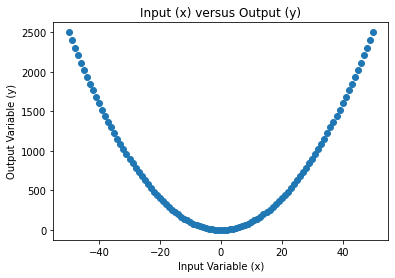

In [17]:
# example of creating a univariate dataset with a given mapping function y = x^2

from matplotlib import pyplot
# define the input data
x = [i for i in range(-50,51)]
# define the output data
y = [i**2.0 for i in x]
# plot the input versus the output
pyplot.scatter(x,y)
pyplot.title('Input (x) versus Output (y)')
pyplot.xlabel('Input Variable (x)')
pyplot.ylabel('Output Variable (y)')
pyplot.show()

In [18]:
# Approximating the function
import numpy as np

# define the dataset
x = np.array([i for i in range(-50,51)])
y = np.array([i**2.0 for i in x])
print(x.min(), x.max(), y.min(), y.max())

-50 50 0.0 2500.0


In [19]:
# reshape arrays into rows and cols
x = x.reshape((len(x), 1))
y = y.reshape((len(y), 1))

In [20]:
# separately scale the input and output variables
from sklearn.preprocessing import MinMaxScaler
scale_x = MinMaxScaler()
x = scale_x.fit_transform(x) 
scale_y = MinMaxScaler()
y = scale_y.fit_transform(y)
print(x.min(), x.max(), y.min(), y.max())

0.0 1.0 0.0 1.0


In [31]:
# design the neural network model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential()
model.add(layers.Dense(256, input_dim=1, activation='relu', kernel_initializer='he_uniform'))
model.add(layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(layers.Dense(64, activation='relu', kernel_initializer='he_uniform'))
model.add(layers.Dense(32, activation='relu', kernel_initializer='he_uniform'))
model.add(layers.Dense(8, activation='softmax', kernel_initializer='he_uniform'))
model.add(layers.Dense(1))


In [40]:
# define the loss function and optimization algorithm
model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3, beta_1=0.9, beta_2=0.999, epsilon=1e-08))

In [41]:
# ft the model on the training dataset
history = model.fit(x, y, epochs=500, batch_size=50, verbose=1)

Epoch 1/500
3/3 [==============================] - 1s 5ms/step - loss: 2.2733e-04 - accuracy: 0.0297
Epoch 2/500
3/3 [==============================] - 0s 5ms/step - loss: 2.8355e-04 - accuracy: 0.0297
Epoch 3/500
3/3 [==============================] - 0s 5ms/step - loss: 8.3187e-05 - accuracy: 0.0297
Epoch 4/500
3/3 [==============================] - 0s 7ms/step - loss: 4.3226e-05 - accuracy: 0.0297
Epoch 5/500
3/3 [==============================] - 0s 5ms/step - loss: 4.5669e-05 - accuracy: 0.0297
Epoch 6/500
3/3 [==============================] - 0s 5ms/step - loss: 2.4808e-05 - accuracy: 0.0297
Epoch 7/500
3/3 [==============================] - 0s 5ms/step - loss: 2.9754e-05 - accuracy: 0.0297
Epoch 8/500
3/3 [==============================] - 0s 5ms/step - loss: 2.1251e-05 - accuracy: 0.0297
Epoch 9/500
3/3 [==============================] - 0s 5ms/step - loss: 1.5198e-05 - accuracy: 0.0297
Epoch 10/500
3/3 [==============================] - 0s 7ms/step - loss: 1.3500e-05 - accura

In [43]:
# make predictions for the input data
yhat = model.predict(x)

In [44]:
# inverse transforms
x_plot = scale_x.inverse_transform(x)
y_plot = scale_y.inverse_transform(y)
yhat_plot = scale_y.inverse_transform(yhat)

In [45]:
# report model error
from sklearn.metrics import mean_squared_error
print('MSE: %.3f' % mean_squared_error(y_plot, yhat_plot))

MSE: 45.118


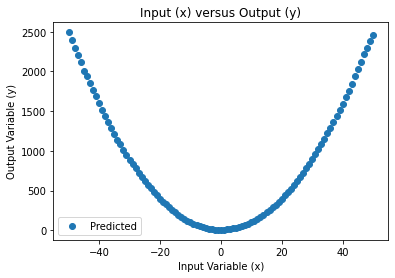

In [46]:
# plot x vs yhat
pyplot.scatter(x_plot,yhat_plot, label='Predicted')
pyplot.title('Input (x) versus Output (y)')
pyplot.xlabel('Input Variable (x)')
pyplot.ylabel('Output Variable (y)')
pyplot.legend()
pyplot.show()

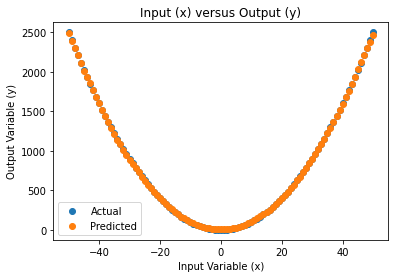

In [47]:
pyplot.scatter(x_plot,y_plot, label='Actual')
pyplot.scatter(x_plot,yhat_plot, label='Predicted')
pyplot.title('Input (x) versus Output (y)')
pyplot.xlabel('Input Variable (x)')
pyplot.ylabel('Output Variable (y)')
pyplot.legend()
pyplot.show()

-50 50 0.0 2500.0
0.0 1.0 0.0 1.0
MSE: 9215.457


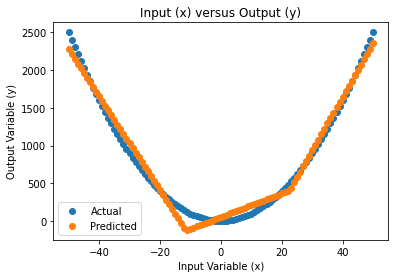

In [30]:
# example of fitting a neural net on x vs x^2
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from numpy import asarray
from matplotlib import pyplot
# define the dataset
x = asarray([i for i in range(-50,51)])
y = asarray([i**2.0 for i in x])
print(x.min(), x.max(), y.min(), y.max())
# reshape arrays into into rows and cols
x = x.reshape((len(x), 1))
y = y.reshape((len(y), 1))
# separately scale the input and output variables
scale_x = MinMaxScaler()
x = scale_x.fit_transform(x)
scale_y = MinMaxScaler()
y = scale_y.fit_transform(y)
print(x.min(), x.max(), y.min(), y.max())
# design the neural network model
model = Sequential()
model.add(Dense(10, input_dim=1, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1))
# define the loss function and optimization algorithm
model.compile(loss='mse', optimizer='adam')
# ft the model on the training dataset
model.fit(x, y, epochs=500, batch_size=10, verbose=0)
# make predictions for the input data
yhat = model.predict(x)
# inverse transforms
x_plot = scale_x.inverse_transform(x)
y_plot = scale_y.inverse_transform(y)
yhat_plot = scale_y.inverse_transform(yhat)
# report model error
print('MSE: %.3f' % mean_squared_error(y_plot, yhat_plot))
# plot x vs y
pyplot.scatter(x_plot,y_plot, label='Actual')
# plot x vs yhat
pyplot.scatter(x_plot,yhat_plot, label='Predicted')
pyplot.title('Input (x) versus Output (y)')
pyplot.xlabel('Input Variable (x)')
pyplot.ylabel('Output Variable (y)')
pyplot.legend()
pyplot.show()